In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
netflix = pd.read_csv("C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Netflix EDA/NetflixOriginals.csv", encoding = "latin-1")

In [3]:
#doing analysis of base dataset + doing preprocessing and cleaning (if needed)
print(netflix.isna().sum(axis=0))

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


In [4]:
#very very generic first hand analysis
'''
- Do top few IMDB score (top 10 and 20)
- Maybe after that view their varying genres and runtime etc
'''

netflix_imdb = netflix.sort_values('IMDB Score', ascending=False)
print(netflix_imdb.head(10))

                                           Title         Genre    Premiere  \
583     David Attenborough: A Life on Our Planet   Documentary   10/4/2020   
582    Emicida: AmarElo - It's All For Yesterday   Documentary   12/8/2020   
581                      Springsteen on Broadway  One-man show  12/16/2018   
579        Taylor Swift: Reputation Stadium Tour  Concert Film  12/31/2018   
578   Ben Platt: Live from Radio City Music Hall  Concert Film   5/20/2020   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary   10/9/2015   
576                      Cuba and the Cameraman    Documentary  11/24/2017   
577                       Dancing with the Birds   Documentary  10/23/2019   
575        The Three Deaths of Marisela Escobedo   Documentary  10/14/2020   
574                                   Seaspiracy   Documentary   3/24/2021   

     Runtime  IMDB Score                  Language  
583       83         9.0                   English  
582       89         8.6           

In [5]:
#sort by genre
print(netflix.nunique(axis = 0))
print(netflix['Genre'].unique())

'''
Maybe try to see for those multiple genres, can clean them to be seperately viewed.
'''
netflix[['Genre1', 'Genre2', 'Genre3', 'Genre4']] = netflix['Genre'].str.split('/', expand=True)

#find the top few of documentaries, since they are well scored overall
netflix_docu_top10 = netflix[(netflix['Genre1'] == 'Documentary')
 | (netflix['Genre2'] == 'Documentary')
 | (netflix['Genre3'] == 'Documentary')
 | (netflix['Genre4'] == 'Documentary')].sort_values('IMDB Score', ascending=False)[:10]

print(netflix_docu_top10)


#find the top few of concert films
netflix_concert_top10 = netflix[(netflix['Genre'] == 'Concert Film')
 | (netflix['Genre2'] == 'Concert Film')
 | (netflix['Genre3'] == 'Concert Film')
 | (netflix['Genre4'] == 'Concert Film')].sort_values('IMDB Score', ascending=False)[:10]

#find top few of generic searched genres (action, comedy, thriller, horror, animation)
netflix_action_top10 = netflix[(netflix['Genre1'] == 'Action')
 | (netflix['Genre2'] == 'Action')
 | (netflix['Genre3'] == 'Action')
 | (netflix['Genre4'] == 'Action')].sort_values('IMDB Score', ascending=False)[:10]

netflix_comedy_top10 = netflix[
    (netflix['Genre1'] == 'Comedy')
 | (netflix['Genre2'] == 'Comedy')
 | (netflix['Genre3'] == 'Comedy')
 | (netflix['Genre4'] == 'Comedy')
].sort_values('IMDB Score', ascending = False)[:10]

netflix_thrill_top10 = netflix[
    (netflix['Genre1'] == 'Thriller')
 | (netflix['Genre2'] == 'Thriller')
 | (netflix['Genre3'] == 'Thriller')
 | (netflix['Genre4'] == 'Thriller')
].sort_values('IMDB Score', ascending=False).head(10)

netflix_horror_top10 = netflix[
    (netflix['Genre1'] == 'Horror')
 | (netflix['Genre2'] == 'Horror')
 | (netflix['Genre3'] == 'Horror')
 | (netflix['Genre4'] == 'Horror')
].sort_values('IMDB Score', ascending=False).head(10)

netflix_scifi_top10 = netflix[
    (netflix['Genre1'] == 'Science fiction')
 | (netflix['Genre2'] == 'Science fiction')
 | (netflix['Genre3'] == 'Science fiction')
 | (netflix['Genre4'] == 'Science fiction')
].sort_values('IMDB Score', ascending=False).head(10)

Title         584
Genre         115
Premiere      387
Runtime       124
IMDB Score     54
Language       38
dtype: int64
['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark

(60, 12)


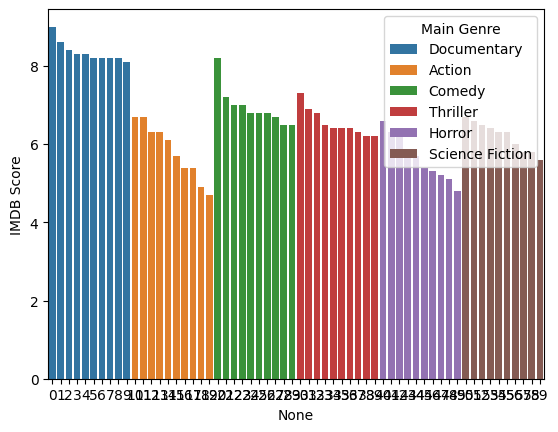

In [6]:
#try to see if i can do graph animation
'''
Doing concatenation for the top 10 of each category
'''

top10_popularcats = pd.concat(
    [netflix_docu_top10, 
     netflix_action_top10, 
     netflix_comedy_top10, 
     netflix_thrill_top10, 
     netflix_horror_top10,
     netflix_scifi_top10], axis=0).reset_index()

top10_popularcats['Main Genre'] = [
    'Documentary' if (x<10) 
    else "Action" if (10<=x<20) 
    else "Comedy" if (20<=x<30)
    else "Thriller" if (30<=x<40)
    else "Horror" if (40<=x<50)
    else "Science Fiction" for x in top10_popularcats.index]

sns.barplot(data=top10_popularcats, x=top10_popularcats.index, y='IMDB Score', hue='Main Genre')
print(top10_popularcats.shape)


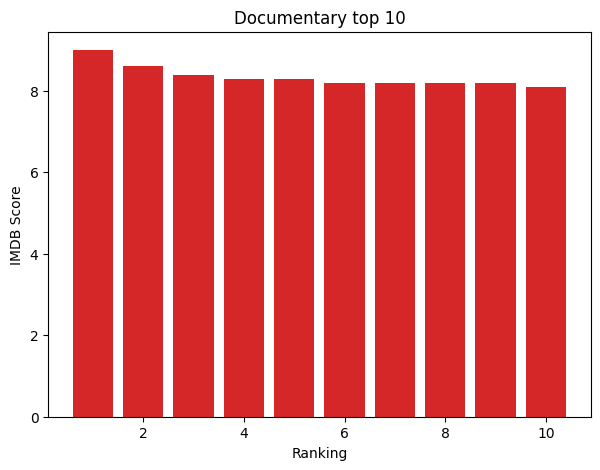

In [63]:
#doing the actual animated graph
from matplotlib import animation
fig = plt.figure(figsize=(7,5))
axes = fig.add_subplot(1,1,1)
ranking = [1,2,3,4,5,6,7,8,9,10]
titles = ["Documentary top 10", "Action top 10", "Comedy top 10", "Thriller top 10", "Horror top 10", "Science fiction top 10"]

colors = ["tab:red", "tab:orange", "tab:green", "tab:blue", "tab:purple", "tab:brown"]
def animate(i):
    axes.clear()
    plt.bar(ranking,top10_popularcats['IMDB Score'][10*i:10*(i+1)], color=colors[i])
    plt.title(titles[i])
    plt.ylabel("IMDB Score")
    plt.xlabel('Ranking')


ani = animation.FuncAnimation(fig, animate, frames=6)
FFwriter = animation.PillowWriter(fps=1)
ani.save("animation2.gif", writer=FFwriter)
